In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns

ROOT = Path("..").resolve()
DATA_RAW   = ROOT / "data" / "raw" / "housing.csv"
DATA_TRAIN = ROOT / "data" / "train"
DATA_TEST  = ROOT / "data" / "test"
IMAGES     = ROOT / "images"
DATA_TRAIN.mkdir(parents=True, exist_ok=True)
DATA_TEST.mkdir(parents=True, exist_ok=True)
IMAGES.mkdir(parents=True, exist_ok=True)


In [6]:
df = pd.read_csv(DATA_RAW)
df = df.copy()
df["income_cat"] = pd.cut(df["median_income"],
                          bins=[0., 1.5, 3., 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])

df.info()
df.describe().transpose().head()
df["ocean_proximity"].value_counts()


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(df, df["income_cat"]):
    train_set = df.loc[train_idx].drop(columns=["income_cat"])
    test_set  = df.loc[test_idx].drop(columns=["income_cat"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
for frame in (train_set, test_set):
    frame["rooms_per_household"] = frame["total_rooms"] / frame["households"]
    frame["bedrooms_per_room"] = frame["total_bedrooms"] / frame["total_rooms"]
    frame["population_per_household"] = frame["population"] / frame["households"]

raw_cols_13 = [
    "longitude","latitude","housing_median_age",
    "total_rooms","total_bedrooms","population","households",
    "median_income","median_house_value","ocean_proximity",
    "rooms_per_household","bedrooms_per_room","population_per_household"
]

train_raw = train_set[raw_cols_13].copy()
test_raw  = test_set[raw_cols_13].copy()

train_raw.to_csv(DATA_TRAIN / "housing_train.csv", index=False)
test_raw.to_csv(DATA_TEST  / "housing_test.csv", index=False)

print("Saved:")
print(" -", DATA_TRAIN / "housing_train.csv")
print(" -", DATA_TEST  / "housing_test.csv")


Saved:
 - C:\Users\MaxGillum\Desktop\492 ML PJ\cmse492_aml\ca_housing_project\data\train\housing_train.csv
 - C:\Users\MaxGillum\Desktop\492 ML PJ\cmse492_aml\ca_housing_project\data\test\housing_test.csv


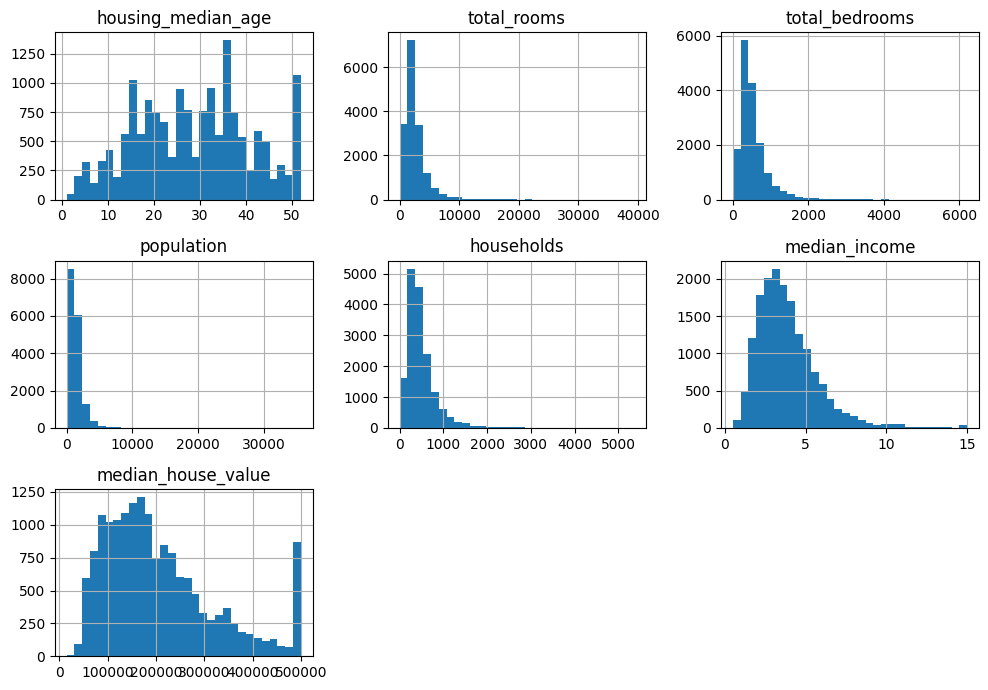

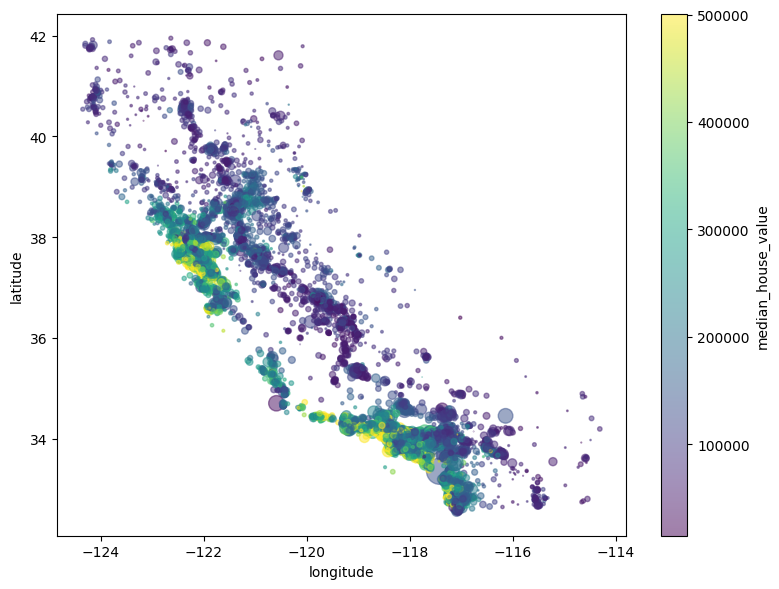

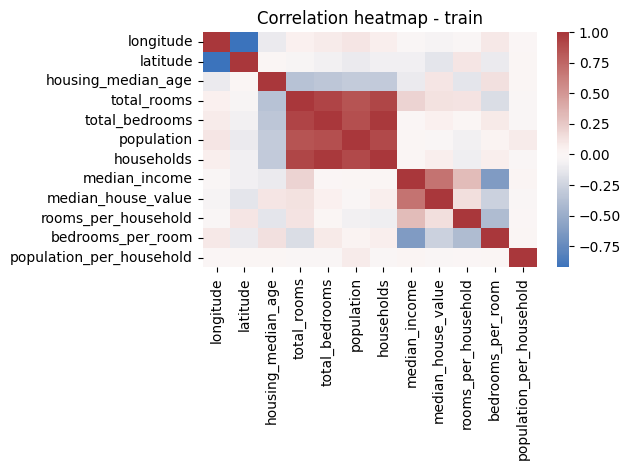

In [4]:
# Histograms
num_cols = ["housing_median_age","total_rooms","total_bedrooms",
            "population","households","median_income","median_house_value"]
train_raw[num_cols].hist(bins=30, figsize=(10,7)); plt.tight_layout()
plt.savefig(IMAGES / "train_histograms.png", dpi=150); plt.show()

# Geo scatter
train_raw.plot(kind="scatter", x="longitude", y="latitude",
               s=train_raw["population"]/100, c="median_house_value",
               cmap="viridis", alpha=0.5, colorbar=True, figsize=(8,6))
plt.tight_layout(); plt.savefig(IMAGES / "geo_scatter_value_population.png", dpi=150); plt.show()

# Correlation heatmap
corr = train_raw.drop(columns=["ocean_proximity"]).corr(numeric_only=True)
sns.heatmap(corr, cmap="vlag", center=0)
plt.title("Correlation heatmap - train"); plt.tight_layout()
plt.savefig(IMAGES / "corr_heatmap_train.png", dpi=150); plt.show()
